In [2]:
import pandas
mc=pandas.read_csv(r'/Users/manick/Python Training/dataset/mtcars.csv',encoding='iso-8859-1')

mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
CarName    32 non-null object
mpg        32 non-null float64
cyl        32 non-null int64
disp       32 non-null float64
hp         32 non-null int64
drat       32 non-null float64
wt         32 non-null float64
qsec       32 non-null float64
vs         32 non-null int64
am         32 non-null int64
gear       32 non-null int64
carb       32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [3]:
mc.head()
# Target variable is numeric the we have to use Regression, Correlation scatter plot
# Numeric and Categorical - Anova Boxplot

,CarName,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df1=mc.loc[:,['mpg','hp','wt','qsec']]
#df1.head()
df1.corr()
## Correlation varies from -1 to +1 if its 
#-1 then negatively correlated, 
#+1 Possitive Corr
# -.25 to +.25 (0) -  Negligible


,mpg,hp,wt,qsec
mpg,1.000000,-0.776168,-0.867659,0.418684
hp,-0.776168,1.000000,0.658748,-0.708223
wt,-0.867659,0.658748,1.000000,-0.174716
qsec,0.418684,-0.708223,-0.174716,1.000000


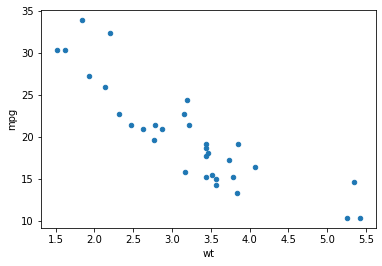

In [5]:
%matplotlib inline
mc.plot.scatter('wt','mpg')
# first variable is for X axis and second one is for Y

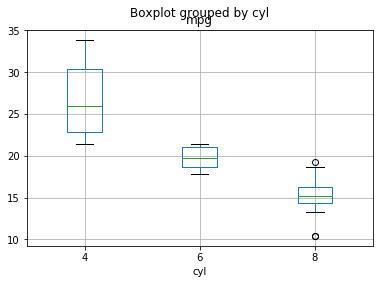

In [6]:
mc.boxplot('mpg',by='cyl')
# by= divided by
# Circle means outlayer
#scikit learn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
## y = a+bx
# mpg= a+b*wt
# a? - Intercept b? - Coefficient

x=mc.loc[:,['wt','hp','qsec']]
y=mc['mpg']
linmod1=LinearRegression()
linmod1.fit(x,y) 
print(linmod1.intercept_,linmod1.coef_)

27.610526858205013 [-4.3587972  -0.01782227  0.51083369]


In [9]:
from sklearn.metrics import r2_score, mean_squared_error
predmpg= linmod1.predict(x)
mse=mean_squared_error(y,predmpg)
r2=r2_score(y,predmpg)

r2 = r2_score(y,predmpg)
n = len(y)    # Number of Samples
p = x.shape[1] # Number of Input variables
 
adjr2 = 1 - (1-r2)*(n-1)/   \
             (n-p-1)

print(mse,r2,adjr2)
#r2 0 to 1, higher r2 is good model if its less than .6 then we needs to finetune

5.814353037983751 0.8347677617058299 0.8170643076028831


In [10]:
from sklearn.feature_selection import RFE
x1 = mc.drop(columns = ['mpg','CarName'])
y1 = mc['mpg']
x1.head(2)

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [11]:
import pandas as pd
from sklearn.feature_selection import RFE
x1 = mc.drop(columns = ['mpg','CarName'])
y1 = mc['mpg']

linmod2 = LinearRegression()
rfemod = RFE(linmod2,1)
rfemod.fit(x1,y1)
x1.columns

varlist = x1.columns
rating = rfemod.ranking_
pd.DataFrame([varlist,rating])


,0,1,2,3,4,5,6,7,8,9
0,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,8,10,9,4,1,3,7,2,6,5


In [12]:

x=mc.loc[:,['wt','am','qsec']]  # add variable here 1,2,3,....X
y=mc['mpg']
linmod3 = LinearRegression()
linmod3.fit(x,y)
prempg = linmod3.predict(x)
r2=r2_score(y,predmpg)

r2 = r2_score(y,predmpg)
n = len(y)    # Number of Samples
p = x.shape[1] # Number of Input variables
 
adjr2 = 1 - (1-r2)*(n-1)/ (n-p-1)

print(r2,adjr2)

0.8347677617058299 0.8170643076028831


In [13]:
print(linmod3.intercept_,linmod3.coef_)

9.617780514561636 [-3.91650372  2.93583719  1.22588597]


In [14]:
mpg(y=a+b1x1+b2x2+b3x3......)
mpg=37.28+

SyntaxError: invalid syntax (<ipython-input-14-fc9de6c20c5d>, line 1)